In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.model_selection import cross_val_score 
dta = sm.datasets.fair.load_pandas().data

In [ ]:
import seaborn as sns

In [ ]:
dta

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666
...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000


In [ ]:
#add "affair" column: 1 represents having affairs, 0 represents not 
dta['affair'] = (dta.affairs > 0).astype(int)

In [ ]:
dta['affair'].value_counts()

0    4313
1    2053
Name: affair, dtype: int64

In [ ]:
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + religious + educ + C(occupation) + C(occupation_husb)', dta, return_type="dataframe")

In [ ]:
X.columns

Index(['Intercept', 'C(occupation)[T.2.0]', 'C(occupation)[T.3.0]',
       'C(occupation)[T.4.0]', 'C(occupation)[T.5.0]', 'C(occupation)[T.6.0]',
       'C(occupation_husb)[T.2.0]', 'C(occupation_husb)[T.3.0]',
       'C(occupation_husb)[T.4.0]', 'C(occupation_husb)[T.5.0]',
       'C(occupation_husb)[T.6.0]', 'rate_marriage', 'age', 'yrs_married',
       'children', 'religious', 'educ'],
      dtype='object')

In [ ]:
X = X.rename(columns = {'C(occupation)[T.2.0]':'occ_2', 'C(occupation)[T.3.0]':'occ_3', 'C(occupation)[T.4.0]':'occ_4', 'C(occupation)[T.5.0]':'occ_5', 
                        'C(occupation)[T.6.0]':'occ_6', 'C(occupation_husb)[T.2.0]':'occ_husb_2', 'C(occupation_husb)[T.3.0]':'occ_husb_3',
                        'C(occupation_husb)[T.4.0]':'occ_husb_4', 'C(occupation_husb)[T.5.0]':'occ_husb_5', 'C(occupation_husb)[T.6.0]':'occ_husb_6'})

In [ ]:
X

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6361,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,32.0,13.0,2.0,3.0,17.0
6362,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,32.0,13.0,1.0,1.0,16.0
6363,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,22.0,2.5,0.0,2.0,14.0
6364,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,32.0,6.0,1.0,3.0,14.0


In [ ]:
y

,affair
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
6361,0.0
6362,0.0
6363,0.0
6364,0.0


In [ ]:
y = np.ravel(y)
y

array([1., 1., 1., ..., 0., 0., 0.])

In [ ]:
X = X.drop(columns = 'Intercept')

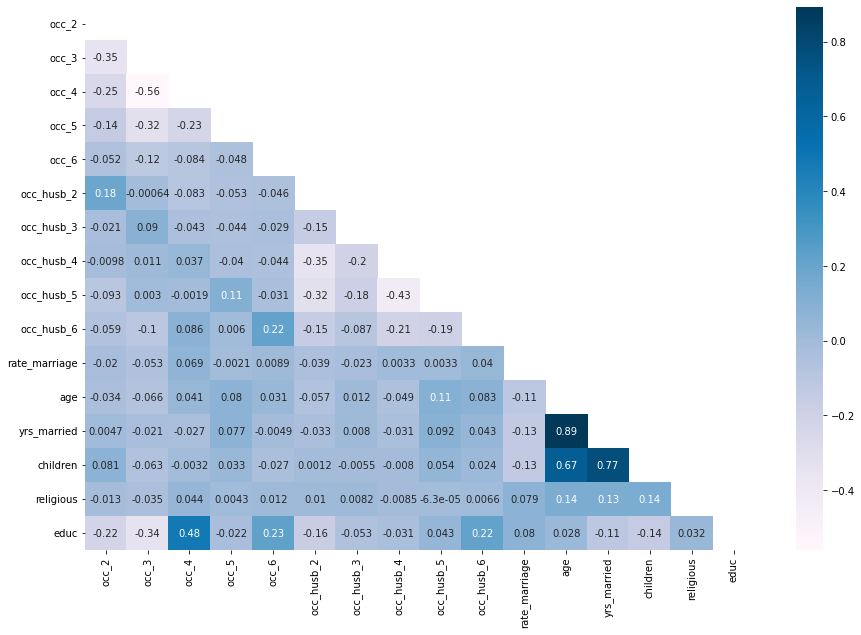

In [ ]:
df_correlation = X.corr()
plt.figure(figsize=(15,10))
# Generate a mask to onlyshow the bottom triangle
mask = np.triu(np.ones_like(df_correlation, dtype=bool))
sns.heatmap(df_correlation,annot=True,cmap='PuBu',mask=mask)

The correlation of 1 (or close to 1) means that the features contain the same information, and if you remove one of them (or remain with one of them), your model will not be affected. On the flip side, if the correlation is -1 (or close to -1), then it means that the features contain different information completely.

In [ ]:
#Compute VIF data for each independent variable
#The variance inflation factor (VIF) quantifies the extent of correlation between one predictor and the other predictors in a model. 
#It is used for diagnosing collinearity/multicollinearity.
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["features"] = X.columns
vif["vif_Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

,features,vif_Factor
0,occ_2,11.194916
1,occ_3,34.065866
2,occ_4,26.397915
3,occ_5,10.272542
4,occ_6,2.717746
5,occ_husb_2,6.576633
6,occ_husb_3,3.098503
7,occ_husb_4,9.574348
8,occ_husb_5,8.699027
9,occ_husb_6,3.385197


We may drop the 'age' column

In [ ]:
X = X.drop(columns = 'age')

In [ ]:
vif = pd.DataFrame()
vif["features"] = X.columns
vif["vif_Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

,features,vif_Factor
0,occ_2,9.955802
1,occ_3,30.003959
2,occ_4,23.988845
3,occ_5,9.173647
4,occ_6,2.583662
5,occ_husb_2,6.479454
6,occ_husb_3,3.051129
7,occ_husb_4,9.445488
8,occ_husb_5,8.555788
9,occ_husb_6,3.340922


TRAIN-TEST SPLIT

In [ ]:
from sklearn.model_selection import StratifiedKFold

print('No Affairss', round(dta['affair'].value_counts()[0]/len(dta) * 100,2), '% of the dataset')
print('Affairs', round(dta['affair'].value_counts()[1]/len(dta) * 100,2), '% of the dataset')

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the Distribution of the labels


# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

No Affairss 67.75 % of the dataset
Affairs 32.25 % of the dataset
Train: [ 411  412  413 ... 6363 6364 6365] Test: [   0    1    2 ... 2913 2914 2915]
Train: [   0    1    2 ... 6363 6364 6365] Test: [ 411  412  413 ... 3775 3776 3777]
Train: [   0    1    2 ... 6363 6364 6365] Test: [ 822  823  824 ... 4637 4638 4639]
Train: [   0    1    2 ... 6363 6364 6365] Test: [1233 1234 1235 ... 5500 5501 5502]
Train: [   0    1    2 ... 5500 5501 5502] Test: [1643 1644 1645 ... 6363 6364 6365]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.67740035 0.32259965]
[0.67792616 0.32207384]


In [ ]:
print('Original set  ---> ',X.shape,y.shape,'\nTraining set  ---> ',original_Xtrain.shape,original_ytrain.shape,'\nTesting set   ---> ', original_Xtest.shape, original_ytest.shape)

Original set  --->  (6366, 15) (6366, 1) 
Training set  --->  (5093, 15) (5093, 1) 
Testing set   --->  (1273, 15) (1273, 1)


We will normalize the data with sklearn MinMaxScaler where the numerical values will be scaled to values between 0 and 1.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

print('\033[1mTransformation on Training set'.center(120))
Train_X_tr = scaler.fit_transform(original_Xtrain)
Train_X_tr = pd.DataFrame(Train_X_tr, columns=X.columns)
display(Train_X_tr.describe())

print('\n','\033[1mTransformation on Testing set'.center(120))
Test_X_tr = scaler.transform(original_Xtest)
Test_X_tr = pd.DataFrame(Test_X_tr, columns=X.columns)
display(Test_X_tr.describe())

                                           Transformation on Training set                                           


,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,yrs_married,children,religious,educ
count,5093.000000,5093.000000,5093.000000,5093.000000,5093.000000,5093.000000,5093.000000,5093.000000,5093.000000,5093.000000,5093.000000,5093.000000,5093.000000,5093.000000,5093.000000
mean,0.138229,0.437463,0.286079,0.114471,0.017082,0.208718,0.077361,0.318280,0.279992,0.079914,0.778372,0.379527,0.256484,0.475031,0.472770
std,0.345174,0.496122,0.451971,0.318414,0.129591,0.406432,0.267190,0.465855,0.449039,0.271186,0.239016,0.325133,0.263888,0.292418,0.197069
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.750000,0.088889,0.000000,0.333333,0.272727
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.750000,0.244444,0.181818,0.333333,0.454545
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.711111,0.363636,0.666667,0.636364
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



                                            Transformation on Testing set                                            


,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,yrs_married,children,religious,educ
count,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000
mean,0.121760,0.435978,0.296151,0.123331,0.017282,0.192459,0.075412,0.321288,0.277298,0.096622,0.773566,0.372872,0.243948,0.476826,0.477041
std,0.327136,0.496079,0.456738,0.328946,0.130371,0.394386,0.264159,0.467155,0.447841,0.295559,0.245707,0.317265,0.247018,0.294383,0.201724
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.750000,0.088889,0.000000,0.333333,0.272727
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.750000,0.244444,0.181818,0.333333,0.454545
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.555556,0.363636,0.666667,0.636364
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We are now ready to train our linear classification model.

In [ ]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(Train_X_tr, np.ravel(original_ytrain))

LogisticRegression()

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
training_score = cross_val_score(log_model, Train_X_tr, np.ravel(original_ytrain), cv=5)
testing_score = cross_val_score(log_model, Test_X_tr, np.ravel(original_ytest), cv=5)

print("Classifiers: ", log_model.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy ")
print("Classifiers: ", log_model.__class__.__name__, "Has a testing score of", round(testing_score.mean(), 2) * 100, "% accuracy ")

Classifiers:  LogisticRegression Has a training score of 72.0 % accuracy 
Classifiers:  LogisticRegression Has a testing score of 75.0 % accuracy 


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

In [ ]:
# Logistic Regression with Grid search
log_reg_params = {"penalty": ['l2'], 'C': [0.0001,0.001, 0.1, 1,10,100]}
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(Train_X_tr, np.ravel(original_ytrain))
best_est = grid_log_reg.best_estimator_

In [ ]:
prediction = best_est.predict(Test_X_tr)
prediction

array([1., 0., 0., ..., 0., 0., 0.])

In [ ]:
training_score = cross_val_score(best_est, Train_X_tr, np.ravel(original_ytrain), cv=5)
testing_score = cross_val_score(best_est, Test_X_tr, np.ravel(original_ytest), cv=5)

print("Classifiers: ", log_model.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy ")
print("Classifiers: ", log_model.__class__.__name__, "Has a testing score of", round(testing_score.mean(), 2) * 100, "% accuracy ")

Classifiers:  LogisticRegression Has a training score of 72.0 % accuracy 
Classifiers:  LogisticRegression Has a testing score of 73.0 % accuracy 


In [ ]:
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

In [ ]:
prediction = best_est.predict(Test_X_tr)
pipeline = imbalanced_make_pipeline(best_est)   
accuracy_lst.append(pipeline.score(Test_X_tr, np.ravel(original_ytest)))
precision_lst.append(precision_score(np.ravel(original_ytest), prediction))
recall_lst.append(recall_score(np.ravel(original_ytest), prediction))
f1_lst.append(f1_score(np.ravel(original_ytest), prediction))
auc_lst.append(roc_auc_score(np.ravel(original_ytest), prediction))

In [ ]:
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))

accuracy: 0.7391987431264729
precision: 0.693069306930693
recall: 0.34146341463414637
f1: 0.45751633986928103


In [ ]:
import os
os.chdir('/content/drive/MyDrive/Machine_learning')

In [ ]:
import pickle
pickle.dump(log_model, open('log_model.pkl', 'wb'))

In [ ]:

model = pickle.load(open('log_model.pkl','rb'))

In [ ]:
prediction = model.predict(Test_X_tr)
prediction

array([1., 0., 0., ..., 0., 0., 0.])